In [1]:
### 로지스틱 회귀로 와인 분류하기

In [2]:
import pandas as pd

red_wine = pd.read_csv('data/redwine.csv', sep=';') # 어떤 기호를 구분 점으로 삼을지
white_wine = pd.read_csv('data/whitewine.csv', sep=';')

red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
red_wine = red_wine[['alcohol', 'residual sugar', 'pH']]
red_wine.rename(columns={'residual sugar':'sugar'}, inplace=True)
red_wine['class'] = 0
red_wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0
1,9.8,2.6,3.20,0
2,9.8,2.3,3.26,0
3,9.8,1.9,3.16,0
4,9.4,1.9,3.51,0


In [4]:
white_wine = white_wine[['alcohol', 'residual sugar', 'pH']]
white_wine.rename(columns={'residual sugar' : 'sugar'} , inplace=True)
white_wine['class'] = 1
white_wine.head()

,alcohol,sugar,pH,class
0,8.8,20.7,3.00,1
1,9.5,1.6,3.30,1
2,10.1,6.9,3.26,1
3,9.9,8.5,3.19,1
4,9.9,8.5,3.19,1


In [5]:
wine = pd.concat([red_wine, white_wine]) # 화이트 와인과 레드 와인 합치기

In [6]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 253.8 KB


In [7]:
wine.describe() # 열에 대한 간략한 통계를 출력

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [8]:
data = wine[['alcohol', 'sugar', 'pH']]
target = wine[['class']]


In [9]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = \
train_test_split(data, target)

In [10]:
# 표준화 하기
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)


In [11]:
# 로지스틱 회귀 모델을 훈련
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7764778325123153
0.7932307692307692


C:\Users\yerin\Desktop\DAMF\ML\venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### 결정 트리 
    - 예/ 아니오에 대한 질문을 이어나가면서 정답을 찾아 학습하는 알고리즘
    - 맨 위의 노드를 루트 노드, 맨 아래 끝에 달린 노드를 리프 노드
    - 리프 노드에서 가장 많은 클래스가 예측 클래스가 됨
    - 어떤 특성이 가장 유용한지 나타내는 특성 중요도 계산

In [12]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth = 3) # 깊이 = 3
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))

print(dt.score(test_scaled, test_target))

0.8485221674876847
0.8535384615384616


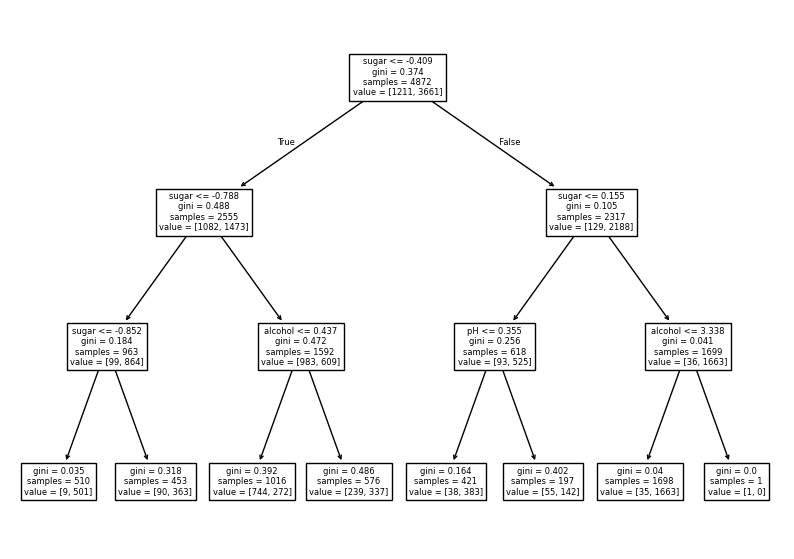

In [13]:
# plot_tree() 함수를 사용해 결정 트리를 이해하기 쉬운 그림으로 출력
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7)) # 가로 10인치, 세로 7인치 크기의 그림이 만들어
plot_tree(dt, max_depth=3, feature_names = ['alcohol', 'sugar', 'pH']) # max_depth 가지의 개수 제한
plt.show()
# 테스트 조건(sugar)
# 불순도 (gini) = 1 - (음성 클래스 비율 ^2 + 양성 클래스 비율 ^2), 낮을 수록 좋음
# 총 샘플 수 (samples)
# 클래스별 샘플 수 (value), # value = [1191, 3681] : 클래스가 0인 레드와인, 클래스가 1인 화이트와인
# 특성 중요도 = 루트 노드와 깊이 1에서 당도를 사용했기 떄문에 아마도 당도가 가장 유용한 특성 중 하나로 추정

In [14]:
print(dt.feature_importances_) # 어떤 특성이 가장 중요한지

[0.09954951 0.88789527 0.01255522]
